## 《Python程序设计》2023秋季
**<font size=4>7 Python类与对象</font>**

**机械科学与工程学院  刘潇**

本节要点包括：
- 了解面向对象编程的思维方式
- 掌握Python中类与对象的属性和方法的创建
- 了解Python面向对象编程的继承、多态和封装的特点


### 打印出2到20内的斐波那契数列 F(1) = 1, F(2) = 1, F(n) = F(n-1) + F(n-2)（n>=2，n∈N*）

#### 函数编程

In [10]:
from functools import reduce
reduce(lambda  list1, number: number == list1[-1] + list1[-2] and list1 + [number] or list1, \
       range(2,20), [1,1])

[1, 1, 2, 3, 5, 8, 13]

#### 面向过程编程

In [21]:
list1 = [1, 1]
i = len(list1)
for number in range(2, 20):
    if number == list1[i-1] + list1[i-2]:
        list1.append(number)
        i += 1
print(list1)

[1, 1, 2, 3, 5, 8, 13]


#### 面向对象编程

In [1]:
# 创建斐波拉契数类型
class Fib:
    def __init__(self, n): # 初始化fib值，构造函数
        self.self = 1
        self.pre = 1
        if n <= 2:
            self.self = self.pre
        else:
            for i in range(n-2):
                self.next()
    def get(self):
        return self.self
    def next(self):
        self.self += self.pre #更新self.self的值
        self.pre = self.self - self.pre # 更新self.pre的值
        return self.self
    def prev(self):
        self.pre = self.self - self.pre #更新self.pre的值
        self.self -= self.pre # 更新self.self的值
        return self.self

for i in range(1,8):
    fib = Fib(i)
    print(fib.get(), end = " ")

1 1 2 3 5 8 13 

### 计算铅球飞行距离l
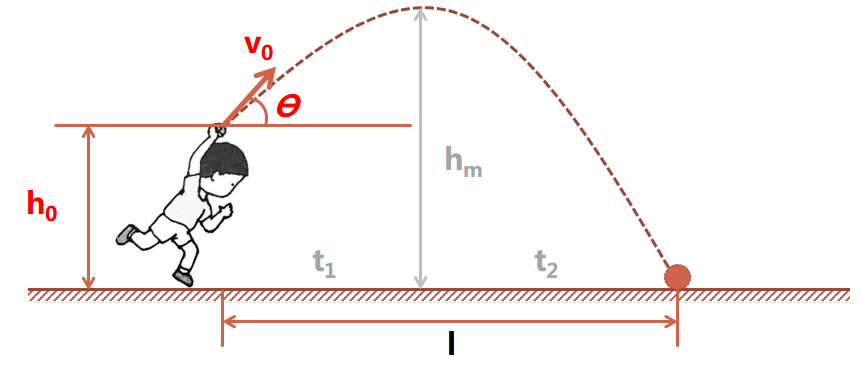

#### 面向过程编程

In [51]:
import math
h0 = input("输入初始高度h0(m): ")
v0 = input("输入初始速度v0(m/s): ")
theta = input("输入抛掷角度theta(角度值): ")
t1, t2, hm, l, g = 0, 0, 0, 0, 9.8
h0 = float(h0)
v0 = float(v0)
theta = float(theta)/180*math.pi

#计算t1, t2和hm
t1 = v0*math.sin(theta)/g
hm = h0 + (v0*math.sin(theta))**2/2/g
t2 = math.sqrt(2*hm/g)

#计算l
l = v0*math.cos(theta)*(t1+t2)
print("飞行距离为{:.2f}米".format(l))

输入初始高度h0(m): 1.8
输入初始速度v0(m/s): 10
输入抛掷角度theta(角度值): 45
飞行距离为11.77米


In [57]:
import math
t_interval, g = 0.001, 9.8 #时间间隔为0.001s, 重力加速度为9.8m/s2

# 输入参数
h0 = eval(input("输入初始高度h0(m): "))
v0 = eval(input("输入初始速度v0(m/s): "))
theta = eval(input("输入抛掷角度theta(角度值): "))
theta = float(theta)/180*math.pi

# 定义铅球的初始信息
x_pos, y_pos, x_v, y_v  = 0, h0, v0*math.cos(theta), v0*math.sin(theta)

# 位置和速度更新函数
def update(t_interval, x_pos, y_pos, x_v, y_v):
    x_pos = x_pos + x_v*t_interval
    y_v1 = y_v - t_interval*g #y_v1为时间间隔的终止速度
    y_pos = y_pos + t_interval*(y_v+y_v1)/2
    y_v = y_v1
    return x_pos, y_pos, x_v, y_v

while y_pos>=0:
    x_pos, y_pos, x_v, y_v = update(t_interval, x_pos, y_pos, x_v, y_v)
print("飞行距离为{:.2f}米".format(x_pos))

输入初始高度h0(m): 1.8
输入初始速度v0(m/s): 10
输入抛掷角度theta(角度值): 45
飞行距离为11.77米


#### 面向对象编程

In [67]:
import math
# 创建投射体类型
class projectile:
    def __init__(self, h0, v0, theta):
        theta = float(theta)/180*math.pi
        self.x_pos = 0
        self.y_pos = h0
        self.x_v = v0*math.cos(theta)
        self.y_v = v0*math.sin(theta)
    def update(self, t_interval):
        g = 9.8 #重力加速度为9.8m/s2
        self.x_pos = self.x_pos + self.x_v*t_interval
        y_v1 = self.y_v - t_interval*g #y_v1为时间间隔的终止速度
        self.y_pos = self.y_pos + t_interval*(self.y_v+y_v1)/2
        self.y_v = y_v1
    def getX(self):
        return self.x_pos
    def getY(self):
        return self.y_pos

# 输入参数
h0 = eval(input("输入初始高度h0(m): "))
v0 = eval(input("输入初始速度v0(m/s): "))
theta = eval(input("输入抛掷角度theta(角度值): "))

shot1 = projectile(h0, v0, theta) #创建shot1对象
while shot1.getY() >= 0:
    shot1.update(0.001)
print("飞行距离为{:.2f}米".format(shot1.getX()))

输入初始高度h0(m): 1.8
输入初始速度v0(m/s): 10
输入抛掷角度theta(角度值): 45
飞行距离为11.77米


### 创建类

In [8]:
class NewClass:
    ClsVar = 1
    
    @classmethod
    def Clsmethod(cls):
        print(cls.ClsVar)
        
    def Objmethod(self):
        self.ObjVar = 2
        print(self.ObjVar)

### 类属性与对象属性

In [9]:
a = NewClass() #创建对象a
b = NewClass() #创建对象b
print(dir(NewClass), dir(a), dir(b), dir(), sep = "\n")

['ClsVar', 'Clsmethod', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['ClsVar', 'Clsmethod', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['ClsVar', 'Clsmethod', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module_

In [10]:
b.Objmethod()
print(dir(NewClass), dir(a), dir(b), dir(), sep = "\n")

2
['ClsVar', 'Clsmethod', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['ClsVar', 'Clsmethod', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['ClsVar', 'Clsmethod', 'ObjVar', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__'

In [11]:
print(NewClass.ClsVar, a.ClsVar, b.ClsVar)

# 通过类修改类属性影响所有没有重新赋值的对象（引用，浅拷贝）
NewClass.ClsVar = 3
print(NewClass.ClsVar, a.ClsVar, b.ClsVar)

# 通过对象对类属性赋值，类属性变为对象属性，仅影响本对象的属性（独立，深拷贝）
a.ClsVar = 4
print(NewClass.ClsVar, a.ClsVar, b.ClsVar)

# 通过类修改再次类属性只影响没有重新赋值的实例对象
NewClass.ClsVar = 5
print(NewClass.ClsVar, a.ClsVar, b.ClsVar)


1 1 1
3 3 3
3 4 3
5 4 5


In [12]:
# 对象属性是独立的
a.Objmethod()
print(a.ObjVar, b.ObjVar)
a.ObjVar = 3
print(a.ObjVar, b.ObjVar)

# 通过赋值为对象创建独有属性
a.ObjVar2 = 4
print(dir(a), dir(b), sep = "\n")

2
2 2
3 2
['ClsVar', 'Clsmethod', 'ObjVar', 'ObjVar2', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['ClsVar', 'Clsmethod', 'ObjVar', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


In [16]:
NewClass.ClsVar2 = 4
print(dir(NewClass), dir(a), dir(b), dir(), sep = "\n")
print(NewClass.ClsVar2, a.ClsVar2, b.ClsVar2)

['ClsVar', 'ClsVar2', 'Clsmethod', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['ClsVar', 'ClsVar2', 'Clsmethod', 'ObjVar', 'ObjVar2', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['ClsVar', 'ClsVar2', 'Clsmethod', 'ObjVar', 'Objmethod', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__',

### 方法与self

In [27]:
Var = 1
class NewClass2:
    ClsVar = 1
    
    def Objmethod(self):
        self.ObjVar = 2
        print(self.ObjVar)
    
def function1():
    print(Var)

a = NewClass2()
a.Objmethod() # 调用对象方法
print(a.Objmethod() is NewClass2.Objmethod(a))

# 创建对象方法的引用
printObjVar = a.Objmethod
printObjVar()

# 给对象方法重新赋值
a.Objmethod = function1
a.Objmethod()

2
2
2
True
2
1


### 多参数方法

In [19]:
class NewClass3:
    ClsVar = 1
    
    def Objmethod(self):
        self.ObjVar = 2
        print(self.ObjVar)
    
    def Objmethod2(self, x):
        self.ObjVar2 = 3
        return x**self.ObjVar2
    
    def Objmethod3(self, x, *y):
        self.ObjVar3 = 3
        return x**self.ObjVar2 + (NewClass3.ClsVar+1)*y[1]

a = NewClass3()
b = a.Objmethod2(10)
c = a.Objmethod3(10, 5, 6, 7)
print(b, c)

1000 1012


### 类方法

In [34]:
class NewClass4:
    ClsVar = 1
    
    @classmethod
    def Clsmethod(cls):
        print(cls.ClsVar)
    
    @classmethod
    def Clsmethod2(cls):
        print(cls.ClsVar)
        print(self.ClsVar)
        
    def Objmethod(self):
        self.ObjVar = 2
        print(self.ObjVar)

a = NewClass4()
a.Objmethod()
NewClass4.Clsmethod()
a.Clsmethod()
a.Clsmethod2()

2
1
1
1


NameError: name 'self' is not defined

### 类与对象示例

In [9]:
class NewClass5:
    ClsVar = 1
    
    def Objmethod(self, x):
        a = self.Objmethod2()
        return a**x
    
    def Objmethod2(self):
        self.ObjVar = 2
        return NewClass5.ClsVar + self.ObjVar

Obj = NewClass5()
b = Obj.Objmethod(2)
print(b)

# 打印Obj对象的命名空间
for i in range(5, len(dir(Obj)), 5):
    print(dir(Obj)[i-5:i])
    if i+5 >= len(dir(Obj)):
        print(dir(Obj)[i:len(dir(Obj))])

9
['ClsVar', 'ObjVar', 'Objmethod', 'Objmethod2', '__class__']
['__delattr__', '__dict__', '__dir__', '__doc__', '__eq__']
['__format__', '__ge__', '__getattribute__', '__gt__', '__hash__']
['__init__', '__init_subclass__', '__le__', '__lt__', '__module__']
['__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__']
['__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


### 创建一个人的信息的类

In [52]:
import datetime
class person:
    def __init__(self, name):
        self.name = name
        self.birthday = None
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365

p1 = person("zhang3")
print(p1.name)
p1.setBirthday(2000, 10, 1)
p1_age = p1.getAge()
print(p1_age)

zhang3
20


In [54]:
import datetime
class person:
    def __init__(self, name):
        self.name = name
        self.birthday = None
        self.lastchar = self.get_lastchar()
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365
    def get_lastchar(self):
        return self.name[-1]

p1 = person("zhang3")
print(p1.name, p1.lastchar)
p1.setBirthday(2000, 10, 1)
p1_age = p1.getAge()
print(p1_age)

zhang3 3
20


### del方法（析构函数）

In [1]:
import datetime
class person:
    person_number = 0
    def __init__(self, name):
        self.name = name
        self.birthday = None
        self.lastchar = self.get_lastchar()
        person.person_number += 1        
    def __del__(self):
        print("delete {}".format(self.name))  
        person.person_number -= 1
        if person.person_number == 0:
            print("i am the last one")
        else:
            print("There are still {} people left".format(person.person_number))
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365
    def get_lastchar(self):
        return self.name[-1]

p1 = person("zhang3")
print(person.person_number)
p2 = person("li4")
print(person.person_number)
del p1
print(person.person_number)
del p2
print(person.person_number)

1
2
delete zhang3
There are still 1 people left
1
delete li4
i am the last one
0


### str和repr方法

In [12]:
import datetime
class person:
    def __init__(self, name):
        self.name = name
        self.birthday = None
        self.lastchar = self.get_lastchar()
    def __str__(self):
        return "name="+self.name
    def __repr__(self):
        return  self.name   
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365
    def get_lastchar(self):
        return self.name[-1]

p1 = person("wang5")
print(p1)
print(str(p1), repr(p1))

name=wang5
name=wang5 wang5


### setattr方法

In [5]:
import datetime
class person:
    def __init__(self, name):
        self.name = name
        self.birthday = None
        self.lastchar = self.get_lastchar()
    def __setattr__(self, x, y):
        if x == "NAME":
            self.name = y
            self.lastchar = y[-1]
        else:
            self.__dict__[x] = y
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365
    def get_lastchar(self):
        return self.name[-1]

p1 = person("zhang3")
print(p1.name, p1.lastchar)
p1.name = "li4"
print(p1.name, p1.lastchar)
p1.NAME = "wang5"
print(p1.name, p1.lastchar)

zhang3 3
li4 3
wang5 5


### lt方法

In [13]:
import datetime
class person:
    def __init__(self, name):
        self.name = name
        self.birthday = None
        self.lastchar = self.get_lastchar()
    def __str__(self):
        return self.name
    def __lt__(self, other):
        return self.lastchar < other.lastchar
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365
    def get_lastchar(self):
        return self.name[-1]

p1 = person("zhang5")
p2 = person("li3")
p3 = person("wang4")
list1 = [p1, p2, p3]
for p in list1: print(p)
list1.sort()
for p in list1: print(p)

zhang5
li3
wang4
li3
wang4
zhang5


### 特殊类属性

In [16]:
import datetime
class person:
    "人员信息"
    def __init__(self, name):
        self.name = name
        self.birthday = None
        self.lastchar = self.get_lastchar()
    def __str__(self):
        return self.name
    def __lt__(self, other):
        return self.lastchar < other.lastchar
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365
    def get_lastchar(self):
        return self.name[-1]

p1 = person("zhang3")
print(person.__name__)
print(person.__doc__)
print(person.__bases__)
print(person.__module__)
print(p1.__dict__)
print(p1.__class__)
print(p1.__class__.__name__)

person
人员信息
(<class 'object'>,)
__main__
{'name': 'zhang3', 'birthday': None, 'lastchar': '3'}
<class '__main__.person'>
person


### 继承

In [25]:
class A:
    pass
class B:
    a = 1
class C(B):
    b = 2
    def cal(self):
        print(C.a + C.b)

obj = C()
obj.cal()

3


In [32]:
class A:
    pass
class B:
    a = 1
class C(B):
    b = 2
    def cal(self):
        print(C.a + C.b)

obj1 = C()
obj.cal()
C.a = 2
obj.cal()
obj2 = B()
print(obj2.a)
print(dir(B))
print(dir(C))

3
4
1
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a', 'b', 'cal']


### 重载方式

In [20]:
class Super:
    def method(self):
        print("in Super.method")
    def delegate(self):
        self.action()
class Inheritor(Super): # 直接继承
    pass
class Replace(Super): # 覆盖超类方法
    def method(self):
        print("in Replace.method")
class Extender(Super): # 扩展超类方法
    def method(self):
        print("starting Extender.method")
        Super.method(self)
        print("ending Extender.method")
class Provider(Super): # 提供超类期待的方法
    def action(self):
        print("in Provider.action")

for x in (Inheritor, Replace, Extender, Provider):
    print("\n" + x.__name__ + "...")
    x().method()
print("\nProvider")
Provider().delegate()


Inheritor...
in Super.method

Replace...
in Replace.method

Extender...
starting Extender.method
in Super.method
ending Extender.method

Provider...
in Super.method

Provider
in Provider.action


### 运算符重载

In [5]:
class Cls:
    def SetData(self, var):
        self.data = var
    def Output(self):
        print(self.data)
class Cls2(Cls):
    def __init__(self, var):
        self.data = var
    def __add__(self, other):
        return Cls2(self.data + other)
    def __mul__(self, other):
        self.data = self.data * other

a = Cls2("add")
a.Output()
b = a + "some thing"
b.Output()
a * 3
a.Output()
c = a * 3
c.Output()

add
addsome thing
None
addaddadd


AttributeError: 'NoneType' object has no attribute 'Output'

In [7]:
# 从int, float, str, list, dict派生类
class number(int):
    def __init__(self, var):
        int.__init__(self)
        self.number = var
    def __mul__(self, other):
        return other*self.number

Num1 = number(2)
print(Num1*"hello world")

hello worldhello world


### 继承示例

In [44]:
import datetime
class person1:
    "人员信息"
    def __init__(self, name):
        self.name = name
        self.birthday = None
        self.lastchar = self.get_lastchar()
    def __str__(self):
        return self.name
    def __lt__(self, other):
        return self.lastchar < other.lastchar
    def setBirthday(self, year, month, day):
        self.birthday = datetime.date(year, month, day)
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return ((datetime.date.today()-self.birthday).days)//365
    def get_lastchar(self):
        return self.name[-1]

In [45]:
class HUST(person1):
    nextIdNum = 1
    def __init__(self, name):
        person1.__init__(self, name)
        self.idNum = HUST.nextIdNum
        HUST.nextIdNum +=1
    def getIdNum(self):
        return self.idNum
    def __lt__(self, other):
        return self.idNum < other.idNum
h1 = HUST("zhang5")
h2 = HUST("li3")
h3 = HUST("wang4")
p1 = person1("zhang5")
n1 = h1.getIdNum()
print(h1, n1, p1)
print(h1 < h2, h3 < h2)
print(p1 < h1)
print(h1 < p1)

zhang5 1 zhang5
True False
False


AttributeError: 'person1' object has no attribute 'idNum'

In [46]:
class Student(HUST):
    pass
class UG(Student):
    def __init__(self, name, classYear):
        HUST.__init__(self, name)
        self.year = classYear
    def getClass(self):
        return self.year
class Grad(Student):
    pass

s1 = UG("John", 2017)
s2 = Grad("Fred")

print(s1.getIdNum())
print(s1.getClass())
print(s2.getIdNum())
print(isinstance(s1, UG))
print(isinstance(s1, person1))
print(isinstance(s2, person1))
print(issubclass(UG, person1))

4
2017
5
True
True
True
True


### 多态

In [48]:
class Animal:
    def talk(self):
        print("Animal is talking")
class People(Animal):
    def talk(self):
        print("say hello")
class Dog(Animal):
    pass
class Pig(Animal):
    def talk(self):
        print("say hengheng")

def Func(obj):
    obj.talk()
people = People()
dog = Dog()
pig = Pig()
Func(people)
Func(dog)
Func(pig)

say hello
Animal is talking
say hengheng


In [49]:
def add(a, b):
    return a + b

# 参数是数字
print(add(100, 200))

# 参数是字符串
print(add("hello", "world"))

# 参数是列表
print(add([100, 200], [300, 500]))

300
helloworld
[100, 200, 300, 500]


### 封装

In [57]:
import math
# 创建投射体类型
class projectile:
    def __init__(self, h0, v0, theta):
        theta = float(theta)/180*math.pi
        self.__x_pos = 0
        self.__y_pos = h0
        self.__x_v = v0*math.cos(theta)
        self.__y_v = v0*math.sin(theta)
    def update(self, t_interval):
        g = 9.8 #重力加速度为9.8m/s2
        self.__x_pos = self.__x_pos + self.__x_v*t_interval
        y_v1 = self.__y_v - t_interval*g #y_v1为时间间隔的终止速度
        self.__y_pos = self.__y_pos + t_interval*(self.__y_v+y_v1)/2
        self.__y_v = y_v1
    def getX(self):
        return self.__x_pos
    def getY(self):
        return self.__y_pos

# 输入参数
h0 = eval(input("输入初始高度h0(m): "))
v0 = eval(input("输入初始速度v0(m/s): "))
theta = eval(input("输入抛掷角度theta(角度值): "))

shot1 = projectile(h0, v0, theta) #创建shot1对象
while shot1.getY() >= 0:
    shot1.update(0.001)
print("飞行距离为{:.2f}米".format(shot1.getX()))
print("飞行距离为{:.2f}米".format(shot1.__x_pos))

输入初始高度h0(m): 1.8
输入初始速度v0(m/s): 10
输入抛掷角度theta(角度值): 45
飞行距离为11.77米


AttributeError: 'projectile' object has no attribute '__x_pos'